7 Build Deep ANN use pytorch
Here’s a step-by-step guide to building a deep ANN with PyTorch:

Load and preprocess the dataset.
Define a deeper neural network model.
Train the model.
Visualize the training results.

Explanation
Deeper Layers: The model has three hidden layers with batch normalization and dropout. This architecture can capture more complex patterns in the data.
Batch Normalization: This helps in stabilizing the learning process and accelerates the convergence of the training.
Dropout: It is used to prevent overfitting by randomly setting the outputs of a portion of neurons to zero during training.
This deeper network is tailored for the Iris dataset but can be adjusted to suit more complex datasets or tasks. Keep in mind to adjust the learning rate, number of epochs, and model complexity based on the specific characteristics of the dataset to avoid overfitting.

Epoch 1, Train Loss: 0.4234, Val Loss: 0.7077
Epoch 2, Train Loss: 0.2355, Val Loss: 0.3509
Epoch 3, Train Loss: 0.1583, Val Loss: 0.1690
Epoch 4, Train Loss: 0.1177, Val Loss: 0.0907
Epoch 5, Train Loss: 0.2405, Val Loss: 0.0545
Epoch 6, Train Loss: 0.1335, Val Loss: 0.0552
Epoch 7, Train Loss: 0.1055, Val Loss: 0.0395
Epoch 8, Train Loss: 0.1111, Val Loss: 0.0230
Epoch 9, Train Loss: 0.1063, Val Loss: 0.0213
Epoch 10, Train Loss: 0.1871, Val Loss: 0.0275
Epoch 11, Train Loss: 0.1018, Val Loss: 0.0221
Epoch 12, Train Loss: 0.1045, Val Loss: 0.0213
Epoch 13, Train Loss: 0.2018, Val Loss: 0.0207
Epoch 14, Train Loss: 0.0624, Val Loss: 0.0280
Epoch 15, Train Loss: 0.0492, Val Loss: 0.0255
Epoch 16, Train Loss: 0.1162, Val Loss: 0.0260
Epoch 17, Train Loss: 0.1190, Val Loss: 0.0171
Epoch 18, Train Loss: 0.1445, Val Loss: 0.0318
Epoch 19, Train Loss: 0.0982, Val Loss: 0.0288
Epoch 20, Train Loss: 0.3756, Val Loss: 0.0217
Epoch 21, Train Loss: 0.0913, Val Loss: 0.0362
Epoch 22, Train Loss: 

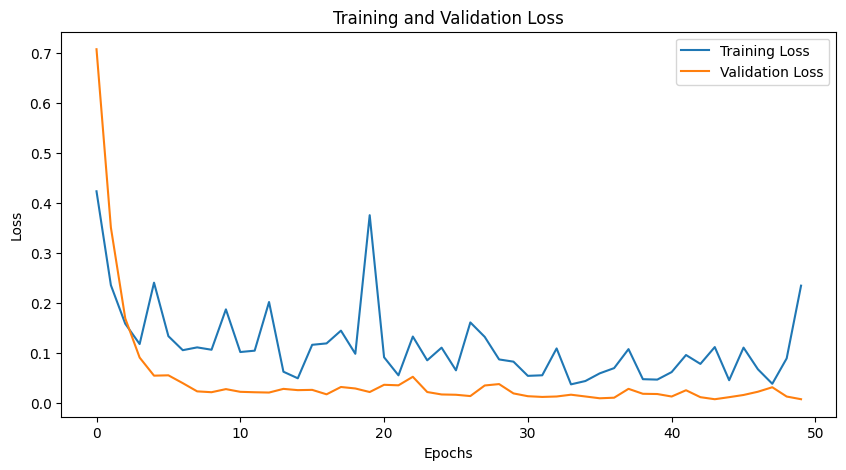

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encoding the labels
encoder = LabelBinarizer()
y_encoded = encoder.fit_transform(y)
y_encoded = y_encoded.astype(np.float32)

# Convert numpy arrays to PyTorch tensors
X_scaled = torch.tensor(X_scaled, dtype=torch.float32)
y_encoded = torch.tensor(y_encoded, dtype=torch.float32)

# Creating a dataset and dataloader
dataset = TensorDataset(X_scaled, y_encoded)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.3, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Defining a deeper neural network
class DeepIrisNet(nn.Module):
    def __init__(self):
        super(DeepIrisNet, self).__init__()
        self.layer1 = nn.Sequential(nn.Linear(4, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.1))
        self.layer2 = nn.Sequential(nn.Linear(128, 256), nn.ReLU(), nn.BatchNorm1d(256), nn.Dropout(0.1))
        self.layer3 = nn.Sequential(nn.Linear(256, 128), nn.ReLU(), nn.BatchNorm1d(128), nn.Dropout(0.1))
        self.output = nn.Linear(128, 3)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.output(x)
        return x

model = DeepIrisNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    train_losses, test_losses = [], []
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, torch.max(labels, 1)[1])
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        train_losses.append(avg_loss)

        # Validation
        model.eval()
        with torch.no_grad():
            val_loss = 0
            for inputs, labels in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, torch.max(labels, 1)[1])
                val_loss += loss.item()
            val_loss /= len(test_loader)
            test_losses.append(val_loss)

        print(f'Epoch {epoch+1}, Train Loss: {avg_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, test_losses

train_losses, test_losses = train_model(model, train_loader, test_loader, criterion, optimizer)

# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
